#Missing Data Imputation
1. Mean Imputation
2. Mode imputation
3. Model-based imputation-KNN
4. Model-based imputation-regression
5. Multiple imputation-mice
6. Deep neural network imputation-datawig

In [ ]:
!pip install datawig

In [ ]:
!pip install impyute

In [6]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from impyute.imputation.cs import fast_knn, mice
import datawig

In [7]:
#loading data
df=pd.read_csv('imu.csv')
df.head(2)

,Time,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Gyroscope_X,Gyroscope_Y,Gyroscope_Z,Magnetometer_X,Magnetometer_Y,Magnetometer_Z,Velocitemeter_X,Velocitemeter_Y,Velocitemeter_Z,LoadcellA,Quaternion_1,Quaternion_2,Quaternion_3,Quaternion_4
0,737751.912040,0,-1,1.0,-27.0,53.0,1041.0,0.0,0.0,0.0,-2077.0,172.0,3391.0,332.0,NaN,NaN,-0.031,-0.7074
1,737751.912041,0,-1,1.0,-27.0,53.0,1041.0,0.0,0.0,0.0,-2077.0,172.0,3391.0,332.0,NaN,NaN,NaN,-0.7074


In [8]:
data=df.loc[:,['Quaternion_1','Quaternion_2','Quaternion_3','Quaternion_4']]
data.head(2)

,Quaternion_1,Quaternion_2,Quaternion_3,Quaternion_4
0,NaN,NaN,-0.031,-0.7074
1,NaN,NaN,NaN,-0.7074


## Mean Imputation

In [ ]:
impute_mean=SimpleImputer(strategy='mean')
impute_mean.fit(data)
imputed_mean=impute_mean.transform(data)
imputed_mean=pd.DataFrame(imputed_mean,columns=data.columns)
imputed_mean.head(2)

,Quaternion_1,Quaternion_2,Quaternion_3,Quaternion_4
0,-0.168971,-0.016905,-0.031000,-0.7074
1,-0.168971,-0.016905,-0.063265,-0.7074


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


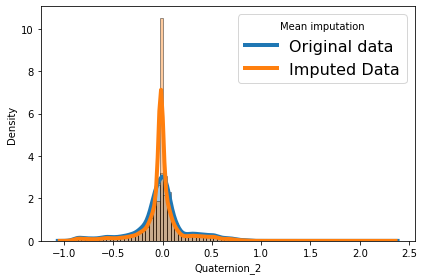

(None, None)

In [ ]:
sns.distplot(data['Quaternion_2'], hist=True, 
             kde=True, bins=90, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4})

sns.distplot(imputed_mean['Quaternion_2'], hist=True, 
             kde=True, bins=90, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4})
plt.legend(['Original data','Imputed Data'], prop={'size': 16}, title = 'Mean imputation')
plt.tight_layout(), plt.show()

## Mode imputation

In [ ]:
impute_mode=SimpleImputer(strategy='most_frequent')
impute_mode.fit(data)
imputed_mode=impute_mode.transform(data)
imputed_mode=pd.DataFrame(imputed_mode,columns=data.columns)
imputed_mode.head(2)

,Quaternion_1,Quaternion_2,Quaternion_3,Quaternion_4
0,-0.8797,0.0645,-0.0310,-0.7074
1,-0.8797,0.0645,0.0272,-0.7074


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


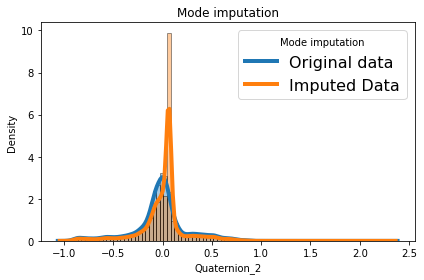

(None, None)

In [ ]:
sns.distplot(data['Quaternion_2'], hist=True, 
             kde=True, bins=90, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4})

sns.distplot(imputed_mode['Quaternion_2'], hist=True, 
             kde=True, bins=90, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4})
plt.legend(['Original data','Imputed Data'], prop={'size': 16}, title = 'Mode imputation')
plt.tight_layout(), plt.show()

##Model based imputation-KNN

In [ ]:
impute_knn=fast_knn(data.values,k=30)

/usr/local/lib/python3.6/dist-packages/impyute/imputation/cs/fast_knn.py:113: RuntimeWarning: invalid value encountered in true_divide
  weights = distances/np.sum(distances)


In [ ]:
imputed_knn=pd.DataFrame(impute_knn,columns=data.columns)
imputed_knn.head(2)

,Quaternion_1,Quaternion_2,Quaternion_3,Quaternion_4
0,-0.168971,-0.018938,-0.031000,-0.7074
1,-0.169096,-0.016983,-0.062347,-0.7074


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


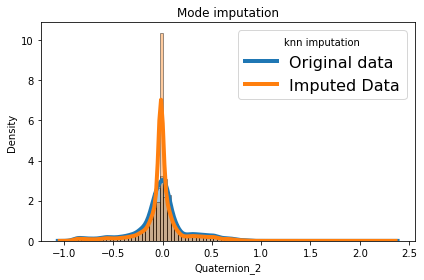

(None, None)

In [ ]:
sns.distplot(data['Quaternion_2'], hist=True, 
             kde=True, bins=90, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4})

sns.distplot(imputed_knn['Quaternion_2'], hist=True, 
             kde=True, bins=90, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4})
plt.legend(['Original data','Imputed Data'], prop={'size': 16}, title = 'knn imputation')
plt.tight_layout(), plt.show()

## Regression imputation

In [ ]:
#creating training and test data to apply regression model
train=data.dropna(axis=0,how='any')
test=data[(data['Quaternion_1'].notnull()) & 
          (data['Quaternion_3'].notnull()) & 
          (data['Quaternion_4'].notnull()) & 
          (data['Quaternion_2'].isnull())]
x_train=train.drop('Quaternion_2',axis=1)
y_train=train['Quaternion_2']
x_test=test.drop('Quaternion_2',axis=1)
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


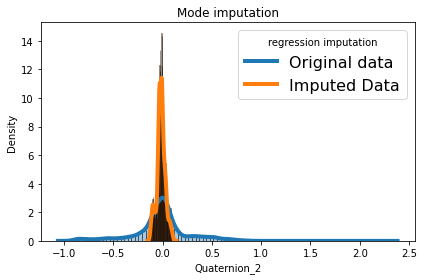

(None, None)

In [ ]:
sns.distplot(data['Quaternion_2'], hist=True, 
             kde=True, bins=90, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4})

sns.distplot(y_pred, hist=True, 
             kde=True, bins=90, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4})
plt.legend(['Original data','Imputed Data'], prop={'size': 16}, title = 'regression imputation')
plt.tight_layout(), plt.show()

##Multiple imputation-mice

In [9]:
impute_mice = mice(data.values)
impute_mice

array([[-0.71196728,  0.08375458, -0.031     , -0.7074    ],
       [-0.68568702,  0.00193441, -0.35177911, -0.7074    ],
       [-0.7049    , -0.0053    , -0.031     ,  0.10074247],
       ...,
       [-0.2191    ,  0.0339    ,  0.0755    ,  0.9705    ],
       [-0.239     ,  0.0556    , -0.0265    ,  0.9674    ],
       [-0.0962936 ,  0.09449364, -0.02028637,  0.28517322]])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


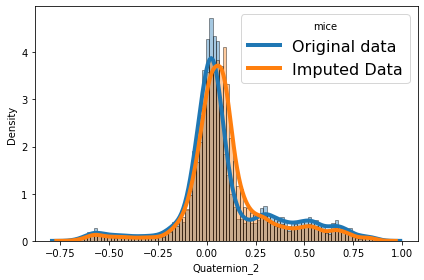

(None, None)

In [10]:
sns.distplot(data['Quaternion_2'], hist=True, 
             kde=True, bins=90, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4})

sns.distplot(impute_mice[:,1], hist=True, 
             kde=True, bins=90, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4})
plt.legend(['Original data','Imputed Data'], prop={'size': 16}, title = 'mice')
plt.tight_layout(), plt.show()

##Deep learning method-datawig

In [ ]:
input_cols = ['Quaternion_1', 'Quaternion_3', 'Quaternion_4']
output_cols = 'Quaternion_2'

model=datawig.SimpleImputer(input_columns=input_cols,
                            output_column=output_cols,
                            output_path = 'datawig_model'  #stores model data and metrics
)
model.fit(train_df=train,num_epochs=50)
y_pred=model.predict(test)

2020-10-13 09:42:09,678 [INFO]  
========== start: fit model
2020-10-13 09:42:09,680 [WARNING]  Already bound, ignoring bind()
2020-10-13 09:42:10,486 [INFO]  Epoch[0] Batch [0-548]	Speed: 11021.30 samples/sec	cross-entropy=13.612039	Quaternion_2-accuracy=0.000000
2020-10-13 09:42:11,297 [INFO]  Epoch[0] Train-cross-entropy=12.532577
2020-10-13 09:42:11,299 [INFO]  Epoch[0] Train-Quaternion_2-accuracy=0.000000
2020-10-13 09:42:11,303 [INFO]  Epoch[0] Time cost=1.616
2020-10-13 09:42:11,312 [INFO]  Saved checkpoint to "datawig_model/model-0000.params"
2020-10-13 09:42:11,381 [INFO]  Epoch[0] Validation-cross-entropy=10.014536
2020-10-13 09:42:11,382 [INFO]  Epoch[0] Validation-Quaternion_2-accuracy=0.000000
2020-10-13 09:42:12,144 [INFO]  Epoch[1] Batch [0-548]	Speed: 11566.77 samples/sec	cross-entropy=9.675480	Quaternion_2-accuracy=0.000000
2020-10-13 09:42:12,892 [INFO]  Epoch[1] Train-cross-entropy=9.496761
2020-10-13 09:42:12,893 [INFO]  Epoch[1] Train-Quaternion_2-accuracy=0.000000

In [ ]:
y_pred

,Quaternion_1,Quaternion_2,Quaternion_3,Quaternion_4,Quaternion_2_imputed
4,-0.7037,NaN,-0.0262,-0.7088,-0.104225
38,-0.7009,NaN,-0.2805,-0.6465,-0.196443
41,-0.6614,NaN,-0.3308,-0.6619,-0.184412
56,-0.7009,NaN,-0.0886,-0.7057,-0.107510
78,-0.6824,NaN,-0.0431,-0.7271,-0.111360
...,...,...,...,...,...
80936,-0.6726,NaN,0.4836,0.4980,0.185841
80956,-0.6851,NaN,0.4981,0.4881,0.161158
80960,-0.6859,NaN,0.5104,0.4707,0.165183
80970,-0.6894,NaN,0.5029,0.4833,0.155214


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


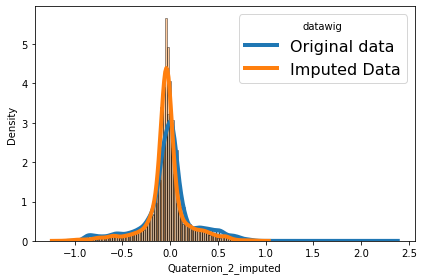

(None, None)

In [ ]:
sns.distplot(data['Quaternion_2'], hist=True, 
             kde=True, bins=90, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4})

sns.distplot(y_pred['Quaternion_2_imputed'], hist=True, 
             kde=True, bins=90, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4})
plt.legend(['Original data','Imputed Data'], prop={'size': 16}, title = 'datawig')
plt.tight_layout(), plt.show()